Welcome to the example Notebook for the second sub-assignment in DLTA.

This Notebook will provide you with an overview regarding the tasks you have to fullfill in order to pass this assignment. In summary, we are looking at earning calls on a finer grid. Each earning call consists of general information and talk and question and answers. The questions are made by employes from stock analyzing companies, the answers are given by employes of the company (usually the big bosses, CEOs, CFOs and so on...). We want to find out if we could develop a model which is able to identify certain labels for each question and each answer. The labels are found in the Label-Studio environment which is explained below. Every time, when we want to build a model, labels are needed, which is where we need everyone in the course. First, you are going to label data. Next you are supposed to show us what you learned with respect to transforming textual information into numerical representation. Next, we want you to develop models which use these representations for predicting the labels made by all course participants. Specifics follow below!

The deadline to submit your Notebook-file is 15.March.2022 12 PM. Please send your notebook and the necessary data to lukas.marx@uni-passau.de.

Please Fill-out the Header with your Team-Information and name the Notebook-file in the following way: "Team_nr_Assingment_2.ipynb"

Your general tasks for this assignment are:

  - Create an Account for Label-Studio (follow to guidance below)
  - Label the provided Earning-Calls-Q&A as described (until the 20.02.2022)
  - Download the labelled tasks from the label-studio plattform (Code-provided // after the 20.02.2022)
  - Extract your annotation together with the labels from the downloaded data
  - Preprocess the textual data and use textual models as described below
  - Generate a Neural Network (or if you want to use other supervised learning model, e.g. gradient boosting) to generate a target model that tries to predict the correct label for a text.
  - You need at least one target Model (or more) that is then used to be trained and tested on the numerical representations (output of textual models) of the labeled texts. 
    - This means you only need to design one model (or more if you want) and then use the text representations from your models (for example Doc2Vec and TFIDF) as training and test data. Then compare the results of the model (or models) regarding the different outputs based on the different input structure.
    - So you compare the result of the model with doc2vec as input to the result of the model with tfidf as input in terms of accuracy regarding the label
    - You only need to generate a model for one ID_Stage ( For example a model that predicts if it is Question_1_company_specific or Question_1_market_related) [you can if you want design a more complex model that may return all label stages]

Every member of each team should label one Earning-Calls Q&A Sections. Therefore Teams of 1 label 1, teams of 2 label 2, teams of 3 label 3, teams of 4 label 4 and teams of 5 label 5. You will get the IDs that you have to label with the E-mail that gives you your Team ID.

Regarding the text modelling part of the Assignment. 

Teams of 1 should use at least one frequency and one other method.
Teams of 2 should use at least one frequency, one topic and one word embedding method.
Teams of 3 should use four different methods, but at least one frequency, one topic and one word embedding method. 
Teams of 4 - 5 should use BOW, TFiDF, LSA, LDA, GloVe, W2Vec and Doc2Vec methods.

While doing the above tasks in the respective quantity you should explain the steps that you undertake. This includes explaining which package or method you are using for a given step, why you are using the method that you are using (what are you trying to achieve) and explain to some extend what your results are and what are their consequences. This obviously is only required for the code based part. You do not need to provide explanation for the labeling process.

Below you find several explanations regarding steps of the assignment. 



# Team information

|Team-number :| 1|
|:----:|:----:|


|Name|    E-Mail        |matriculation-nr.|
|:----:|:----:|:----:|
|Student 1| Student1@uni-passau.de|1234567|
|Student 2| Student2@uni-passau.de|2234567|
|Student 3| Student3@uni-passau.de|3234567|
|Student 4| Student4@uni-passau.de|4234567|
|Student 5| Student5@uni-passau.de|5234567|

The Invite Link to label studio is this: http://132.231.59.226:8080/user/signup/?token=d8c5fa812c1df1a9

You need to be connected to the university wifi or vpn in order to access the server, as it is a localhost on a university server. Please use your university email or if not possible please inform me via email.

Please watch the Video below in Order to understand your First Step in the Assignment.
https://www.youtube.com/watch?v=WK64MOpdHPs


The Code afterwards downloads alle the labeled tasks that are present in the project on label-studio.
You cannot use this code on google colab. If you want to work on google colab you need to locally download the labeled_tasks save it as a csv and upload it to google drive. And continue working on google colab. 

In [ ]:
pip install label_studio

In [ ]:
from label_studio_sdk import Client
from label_studio_sdk import project
from label_studio_sdk import project
import pandas as pd
LABEL_STUDIO_URL = 'http://132.231.59.226:8080' #this address needs to be the same as the address the label-studio is hosted on.
API_KEY = 'YOUR_API_KEY' #please add your personal API_Key here to get your API_Key follow the Pictures below

ls = Client(url=LABEL_STUDIO_URL, api_key=API_KEY)
ls.check_connection()
pro = project.Project.get_from_id(ls,"1")
tasks = project.Project.get_labeled_tasks(pro)
tasks[0]

{'cancelled_annotations': 0,
 'completed_at': '2022-02-01T13:57:24.791602Z',
 'created_at': '2022-01-27T22:14:33.770667Z',
 'annotations_results': '[{value: {start: 71, end: 712, text: One of the areas obviously which has been a strong growth driver for the team in 2019 as you mentioned, Hock, has been cloud and hyperscale data center networking and compute acceleration. You got Tomahawk, Trident, Jericho, your compute and security acceleration, ASICs and the new optical connectivity portfolio. There was a bit of pause in cloud spending in the first half of this year, but it looks like that, that is starting to reaccelerate and loo',
 'data': {'text': ". Our first question comes from Harlan Sur with JP Morgan.\nHarlan Sur: One of the areas obviously which has been a strong growth driver for the team in 2019 as you mentioned, Hock, has been cloud and hyperscale data center networking and compute acceleration. You got Tomahawk, Trident, Jericho, your compute and security acceleration, AS

In order to extract the information from the tasks variable you can use the re.search or re.findall methods. The general structure of these outputs is always the same therefore once you understand it the preperation of the data is fairly simple. A possible Dataframe representation is displayed below.

In [ ]:
Questions

,Company,Quarter,Year,Date,annotation,QID,Q1,Q2,Q3
0,AVGO,4,2019,2019-12-13 17:00:00,""" One of the areas obviously which has been a ...",['QID_1'],['Question_1_Company_specific'],['Question_2_specific'],['Question_3_neutral']


In [ ]:
Answers

,Company,Quarter,Year,Date,annotation,AID,A1,A2,A3
0,AVGO,4,2019,2019-12-13 17:00:00,"""Well, let's start with the first part of your...",['AID_1'],['Answer_1_specific'],['Answer_2_positive'],['Answer_3_no_blame']


# How to get your API Key

open up the label-studio and click the button on the top right corner -> there klick on "Account & Settings".

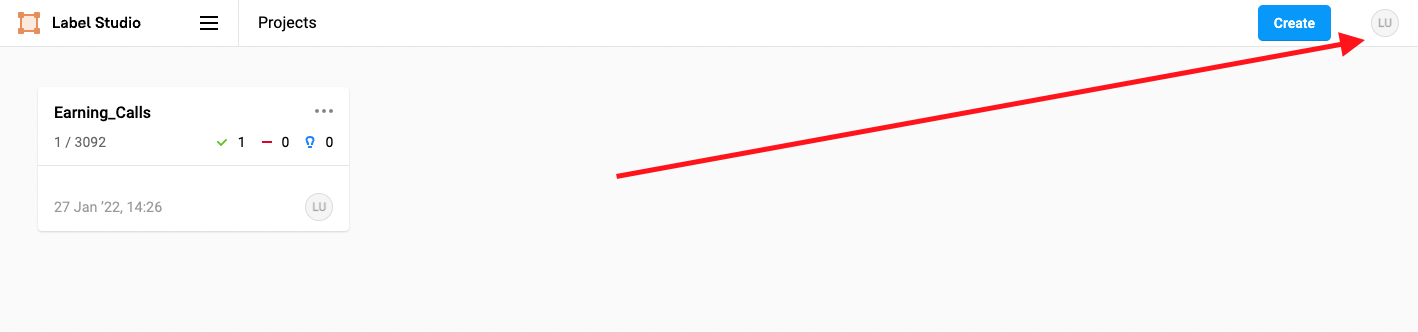


Within this section you find the access token, the one pointed by the red marker is your api key


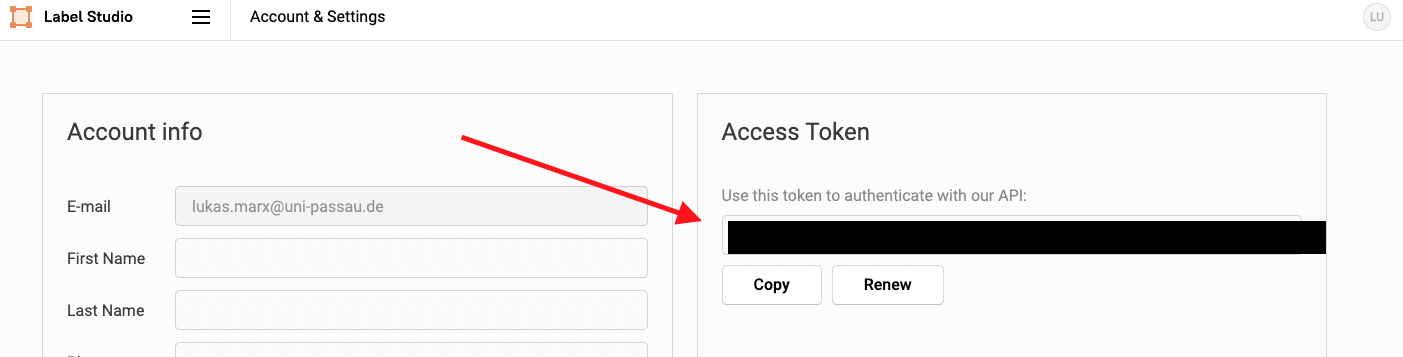